In [1]:
#import relevent libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
print("Libraries imported successfully")

Libraries imported successfully


In [2]:
# load train and test datasets
train=pd.read_csv('datasets/train.csv')
df=pd.DataFrame(train)  
df.head(10)



,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#parameters and hyper-parameters defined
m=train.shape[0] #number of training examples
print("No. of examples : {} ".format(m))
num_layer = 3 # number of layers
input_nodes = train.shape[1]-1# number of input nodes, excludes first column 
print("Input nodes : {} ".format(input_nodes))
h1 = 128      # hidden layer 1
h2 = 64    # hidden layer 2
output_nodes = 10 # number of output nodes


No. of examples : 42000 
Input nodes : 784 


In [4]:
#normalize inputs
input=((np.asfarray(train.iloc[:,1:])).reshape(m,input_nodes)/ 255.0 * 0.99) + 0.01 

#change output to categorial output 
output = np.zeros((m, output_nodes))+ 0.01
for i in range(m):
    output[i, np.array(train.label)[i]] = 0.99
    
# convert output to float datatype
output = output.astype(float)

#transpose output and input
output=np.transpose(output)
input=np.transpose(input)



In [5]:
print("The size of input is {}.".format(input_nodes))
print("The size of output is {}.".format(output_nodes))
print(input.shape)
print(input)
print("output")
print(output.shape)
print(output)

The size of input is 784.
The size of output is 10.
(784, 42000)
[[0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 ...
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]]
output
(10, 42000)
[[0.01 0.99 0.01 ... 0.01 0.01 0.01]
 [0.99 0.01 0.99 ... 0.01 0.01 0.01]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 ...
 [0.01 0.01 0.01 ... 0.99 0.01 0.01]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.01 0.01 0.01 ... 0.01 0.01 0.99]]


In [6]:
#define sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))



In [7]:
#initialize the required parameters with array of appropriate dimensions
def parameters_initialization(input_nodes, h1, h2, output_nodes):
    
    #weights are initialized in each layer with random values
    W1=np.random.randn(h1,input_nodes)*0.1
    b1=np.zeros((h1,1))
    W2=np.random.randn(h2, h1)*np.sqrt(1./h2)
    b2=np.zeros((h2,1))
    W3=np.random.randn(output_nodes, h2)*0.01
    b3=np.zeros((output_nodes,1))
    
    
    parameters={
        "W1":W1,
        "W2":W2,
        "W3":W3,
        "b1":b1,
        "b2":b2,
        "b3":b3
    }
    
    return parameters
    

In [8]:
parameters=parameters_initialization(input_nodes, h1, h2, output_nodes)
print(parameters['W1'])
print(parameters["W2"])
print(parameters["W3"])

[[-1.42787364e-02 -1.48633484e-01  1.29974069e-01 ... -9.05515718e-02
   1.71579005e-01 -1.35575867e-03]
 [-2.94023693e-02 -9.49377037e-02  7.00579616e-02 ...  1.10013859e-03
  -1.06106384e-01  2.34793478e-02]
 [ 1.64466898e-01  7.93440829e-02  8.41996996e-02 ...  2.00053337e-01
  -1.14962173e-02 -1.38469086e-01]
 ...
 [-6.09020675e-02 -4.53856415e-02  6.04364608e-02 ... -6.58328425e-02
  -8.43804773e-02  1.09108347e-01]
 [ 1.70652491e-04 -4.57721465e-03  1.68271559e-01 ...  3.88957378e-02
  -3.81455857e-02  1.41964183e-01]
 [-5.76769100e-02  7.18546408e-03 -2.11929332e-02 ... -7.11729555e-02
   4.62990643e-02  4.11349191e-02]]
[[ 0.02645946 -0.01719742  0.0627435  ...  0.05468848  0.0360655
  -0.04147531]
 [ 0.21808516 -0.09773631 -0.1079572  ... -0.07636199 -0.07129027
  -0.01933653]
 [ 0.15827298 -0.29517864  0.17218599 ...  0.06351968  0.11265616
  -0.22239776]
 ...
 [ 0.04939531  0.12545473 -0.17672758 ... -0.12649708  0.0842434
   0.23369519]
 [-0.13423866 -0.03748212 -0.01558948

In [9]:
#forward propagation
def forward_propagation(input,parameters):
    
    #first layer
    Z1=np.dot(parameters["W1"],input)+parameters["b1"]
    A1=np.tanh(Z1)
    
    #second layer
    Z2=np.dot(parameters["W2"],A1)+parameters["b2"]
    A2=np.tanh(Z2)
    
    #output layer
    Z3=np.dot(parameters["W3"],A2)+parameters["b3"]
    A3=sigmoid(Z3)
    
    
    cache={
        "A1": A1,
        "A2": A2,
        "A3": A3,
        "Z1": Z1,
        "Z2": Z2,
        "Z3": Z3
        
    }
    

    return A3, cache
    

In [10]:
A3, cache=forward_propagation(input,parameters)
print(cache["A3"])

[[0.51040959 0.48481254 0.49688697 ... 0.49671466 0.49473424 0.4963317 ]
 [0.51363307 0.49419639 0.50317212 ... 0.51009413 0.50888    0.51844959]
 [0.50189257 0.52299853 0.50721047 ... 0.50601031 0.5132177  0.49441128]
 ...
 [0.47694349 0.5186801  0.4966448  ... 0.51936121 0.50237245 0.49212728]
 [0.52254734 0.49241951 0.52710292 ... 0.51541502 0.52550361 0.52847802]
 [0.48607448 0.48968755 0.4868227  ... 0.50123659 0.50368312 0.508125  ]]


In [11]:
#compute_cost
def compute_cost(A2, output, parameters):
    logprobs = np.multiply(np.log(A2),output)
    cost = -np.sum(logprobs)/output.shape[1]
    return cost


In [12]:
#back propagation
def back_propagation(input,output,learning_rate,parameters, cache):
 
    dZ3=cache["A3"]-output
    dW3=np.dot(dZ3,cache["A2"].T)/784
    db3 = np.sum(dZ3, axis=1, keepdims = True)/784
   
    
    dZ2=np.dot(parameters["W3"].T,dZ3)*(1 - np.power(cache["A2"], 2))
    dW2=np.dot(dZ2,cache["A1"].T)/784
    db2 = np.sum(dZ2, axis=1, keepdims = True)/784
    
    
    dZ1=np.dot(parameters["W2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1=np.dot(dZ1,input.T)
    db1 = np.sum(dZ1, axis=1, keepdims = True)/784
    
    
    
    grads={
        'dW1':dW1,
        'dW2':dW2,
        'dW3':dW3,
        'db1':db1,
        'db2':db2,
        'db3':db3
    }
    

    return grads
    
    

In [13]:
#update parameters
def update_parameters(parameters,grads):
    
    W1 = parameters["W1"]-learning_rate*grads["dW1"]
    b1 = parameters["b1"]-learning_rate*grads["db1"]
    W2 = parameters["W2"]-learning_rate*grads["dW2"]
    b2 = parameters["b2"]-learning_rate*grads["db2"]
    W3 = parameters["W3"]-learning_rate*grads["dW3"]
    b3 = parameters["b3"]-learning_rate*grads["db3"]

    
    parameters = {"W1": W1,
                  "W2": W2,
                  "W3": W3,
                  "b1": b1,
                  "b2": b2,
                  "b3": b3
                }
    
    return parameters

In [14]:
#train data
num_iterations=200
learning_rate=0.001 
parameters=parameters_initialization(input_nodes, h1, h2, output_nodes)
for epoch in range(0,num_iterations):
    print("Iteration: "+ str(epoch+1)+"/"+str(num_iterations))   
    A3,cache=forward_propagation(input,parameters) #forward propagation
    grads=back_propagation(input,output,learning_rate,parameters,cache) #back propagation
    parameters=update_parameters(parameters,grads) #update parameters
    print("A3")
    print(A3.shape)
    print(cache["A3"].T)

    
    

Iteration: 1/200
A3
(10, 42000)
[[0.51083063 0.48902121 0.50034603 ... 0.50686016 0.51048659 0.50224034]
 [0.48698455 0.5032499  0.48045158 ... 0.49686034 0.51002853 0.50327425]
 [0.49737353 0.50068079 0.49414852 ... 0.49869054 0.49466033 0.50525896]
 ...
 [0.49620532 0.50884486 0.47388073 ... 0.49103939 0.50081665 0.5025462 ]
 [0.50400857 0.52880839 0.50165011 ... 0.49193852 0.48515736 0.51264717]
 [0.50924634 0.50622479 0.50793733 ... 0.49746592 0.50613388 0.4861563 ]]
Iteration: 2/200
A3
(10, 42000)
[[0.46534535 0.46370382 0.47493251 ... 0.49541376 0.50135811 0.46359805]
 [0.45664543 0.45553362 0.46859006 ... 0.48497555 0.49119945 0.46468763]
 [0.4608266  0.46819143 0.46619559 ... 0.49373452 0.48644992 0.46793512]
 ...
 [0.45933521 0.45498778 0.46381377 ... 0.48412701 0.48949169 0.46759683]
 [0.45960708 0.46027148 0.46420422 ... 0.48357839 0.48763651 0.4648331 ]
 [0.45737786 0.45707818 0.46478992 ... 0.48521889 0.49380232 0.46380276]]
Iteration: 3/200
A3
(10, 42000)
[[0.27223423 0.2

A3
(10, 42000)
[[0.10647296 0.15430711 0.12285977 ... 0.11708741 0.11182852 0.10979151]
 [0.12362091 0.10996121 0.11090651 ... 0.10724562 0.11072297 0.10483155]
 [0.10706662 0.16239034 0.12021736 ... 0.12584886 0.11230564 0.11313032]
 ...
 [0.10977041 0.12785324 0.10694253 ... 0.14660317 0.11233549 0.1306544 ]
 [0.11052097 0.12271905 0.11148558 ... 0.10614193 0.10546457 0.11002458]
 [0.10392019 0.12017176 0.10487009 ... 0.12220483 0.10640166 0.11655335]]
Iteration: 20/200
A3
(10, 42000)
[[0.11085008 0.15912388 0.12663456 ... 0.11856145 0.11506159 0.10915974]
 [0.13103408 0.10939651 0.11486828 ... 0.10407996 0.11278141 0.10467261]
 [0.10797198 0.16853979 0.12369833 ... 0.12940745 0.11438697 0.11454819]
 ...
 [0.12000023 0.13467496 0.11414144 ... 0.15787436 0.12114709 0.13226948]
 [0.11403599 0.11948064 0.11384319 ... 0.10313694 0.10566004 0.10894729]
 [0.10617602 0.11822851 0.10707312 ... 0.13333121 0.10884792 0.1227386 ]]
Iteration: 21/200
A3
(10, 42000)
[[0.11192865 0.16939603 0.13154

A3
(10, 42000)
[[0.09532975 0.30737844 0.14449307 ... 0.13070847 0.11810393 0.10180153]
 [0.17626239 0.07467949 0.11502751 ... 0.08356799 0.12492784 0.09106756]
 [0.09217164 0.32950577 0.14012792 ... 0.15444319 0.11703634 0.1157162 ]
 ...
 [0.08388821 0.10094528 0.07698049 ... 0.23614709 0.09661299 0.19554109]
 [0.10882605 0.11606104 0.11978369 ... 0.08941724 0.10079831 0.10512276]
 [0.08108232 0.10523365 0.08151262 ... 0.22884695 0.09533932 0.19565492]]
Iteration: 38/200
A3
(10, 42000)
[[0.12094154 0.23429039 0.16370329 ... 0.09073867 0.13652846 0.07809061]
 [0.18328093 0.07017891 0.11944442 ... 0.06744277 0.12702322 0.07672041]
 [0.09797692 0.31916325 0.14976808 ... 0.12466501 0.12019851 0.09830596]
 ...
 [0.10057298 0.07964545 0.08266155 ... 0.17607479 0.10784601 0.1536375 ]
 [0.10569421 0.10369955 0.12762862 ... 0.06730912 0.1000031  0.08377134]
 [0.09122927 0.07269919 0.09028564 ... 0.14055276 0.10132309 0.15161218]]
Iteration: 39/200
A3
(10, 42000)
[[0.09665894 0.34307266 0.14823

A3
(10, 42000)
[[0.05183182 0.53415102 0.15160955 ... 0.1279096  0.1044002  0.08069657]
 [0.25715192 0.04476974 0.10634849 ... 0.06187385 0.13886446 0.07253418]
 [0.04838763 0.54202933 0.14521674 ... 0.13818765 0.09868161 0.08689634]
 ...
 [0.0546412  0.09473251 0.04640484 ... 0.32101718 0.07415446 0.23386641]
 [0.08273723 0.08476178 0.11487287 ... 0.05791751 0.08200201 0.07598514]
 [0.04958754 0.08288246 0.05812317 ... 0.27941737 0.07332671 0.23854895]]
Iteration: 56/200
A3
(10, 42000)
[[0.08418704 0.40538946 0.17397463 ... 0.08458329 0.13606035 0.05591122]
 [0.27532764 0.04088591 0.11496378 ... 0.04940093 0.14577391 0.06177576]
 [0.05296668 0.53210258 0.1549144  ... 0.11773433 0.10385929 0.07593694]
 ...
 [0.085298   0.08273331 0.05122963 ... 0.27500487 0.09334144 0.1984547 ]
 [0.08264815 0.08554938 0.14501624 ... 0.03922881 0.08837045 0.0585631 ]
 [0.06491684 0.04237264 0.05869238 ... 0.19144073 0.08283669 0.22511488]]
Iteration: 57/200
A3
(10, 42000)
[[0.05241493 0.55491411 0.15770

A3
(10, 42000)
[[0.04555367 0.57716067 0.15608893 ... 0.10440112 0.11345259 0.0477351 ]
 [0.41293067 0.03031377 0.09893916 ... 0.05076048 0.1423717  0.05119796]
 [0.0322545  0.65248196 0.14120458 ... 0.1237932  0.08403995 0.05759872]
 ...
 [0.07075015 0.10434334 0.03121907 ... 0.41618854 0.07474002 0.21920056]
 [0.0859053  0.06649289 0.13421313 ... 0.03393231 0.06737557 0.05076394]
 [0.04420825 0.03362495 0.04188884 ... 0.26486326 0.06597756 0.3124202 ]]
Iteration: 74/200
A3
(10, 42000)
[[0.03155997 0.65429333 0.14753281 ... 0.12126715 0.09680801 0.05908235]
 [0.37897329 0.02611983 0.09394552 ... 0.04464636 0.14412612 0.05017361]
 [0.02846943 0.65092556 0.13721899 ... 0.11928146 0.08180611 0.05633667]
 ...
 [0.05188263 0.09404094 0.02861048 ... 0.42694279 0.06585853 0.24070094]
 [0.05660501 0.06624245 0.14825196 ... 0.02817326 0.06612085 0.04811885]
 [0.03820029 0.04216529 0.04604973 ... 0.27689665 0.06779016 0.31949331]]
Iteration: 75/200
A3
(10, 42000)
[[0.04756069 0.5866575  0.16335

A3
(10, 42000)
[[0.03028273 0.69060125 0.15202349 ... 0.10208533 0.10961488 0.03523007]
 [0.51138507 0.01974386 0.07772162 ... 0.04093265 0.11996297 0.03819867]
 [0.02009757 0.73354024 0.12488381 ... 0.11175854 0.06614134 0.0376366 ]
 ...
 [0.05019703 0.0914133  0.01894782 ... 0.49968307 0.05582321 0.21726131]
 [0.04905894 0.05274729 0.15801515 ... 0.01778485 0.05157226 0.0347384 ]
 [0.02981084 0.02715737 0.03528634 ... 0.23282435 0.06521715 0.34919659]]
Iteration: 92/200
A3
(10, 42000)
[[0.03064183 0.699702   0.14836345 ... 0.10715411 0.11107526 0.03555108]
 [0.52299349 0.0188348  0.0767121  ... 0.04222831 0.1170293  0.03846766]
 [0.01991922 0.7392215  0.1217694  ... 0.1154977  0.06489332 0.03797713]
 ...
 [0.05393645 0.08489303 0.01784986 ... 0.49840858 0.05345288 0.21284349]
 [0.05623289 0.05050303 0.1373208  ... 0.02034604 0.04782555 0.03716261]
 [0.03020073 0.02535086 0.03230619 ... 0.24478413 0.0627853  0.36265525]]
Iteration: 93/200
A3
(10, 42000)
[[0.02972514 0.71066618 0.15370

A3
(10, 42000)
[[0.01979306 0.75664338 0.11597582 ... 0.1097263  0.08755893 0.02960061]
 [0.60214517 0.01355241 0.06344946 ... 0.04000092 0.09512856 0.0296076 ]
 [0.01458835 0.76936604 0.10222763 ... 0.11154183 0.04997183 0.02774323]
 ...
 [0.0566696  0.10473995 0.01265654 ... 0.6201456  0.04702109 0.1981786 ]
 [0.05380496 0.04292655 0.12596259 ... 0.01984132 0.03680067 0.038707  ]
 [0.02336765 0.02193763 0.02547103 ... 0.27254322 0.06006768 0.39979317]]
Iteration: 110/200
A3
(10, 42000)
[[0.01653182 0.75140503 0.13473558 ... 0.09735095 0.08326342 0.02929621]
 [0.61344592 0.01185757 0.06433442 ... 0.03889663 0.09619622 0.03092454]
 [0.0145225  0.76818287 0.10257346 ... 0.10860086 0.04941892 0.02770932]
 ...
 [0.05066326 0.07113307 0.01148557 ... 0.59804326 0.04075104 0.21058119]
 [0.05032052 0.04167814 0.13890893 ... 0.01784331 0.03886921 0.03959191]
 [0.02654993 0.01732517 0.03157758 ... 0.21244495 0.07202396 0.43584344]]
Iteration: 111/200
A3
(10, 42000)
[[0.01892551 0.756233   0.118

A3
(10, 42000)
[[0.01348723 0.77211707 0.10611179 ... 0.09959536 0.09861252 0.0252178 ]
 [0.69046496 0.01043526 0.0534652  ... 0.03656899 0.07559043 0.02303483]
 [0.0110823  0.81376476 0.08400928 ... 0.10322849 0.04029266 0.02053866]
 ...
 [0.05111982 0.08806551 0.00823557 ... 0.67364129 0.03604131 0.17895685]
 [0.04451645 0.03526066 0.11360418 ... 0.01449855 0.02906513 0.03279757]
 [0.01949568 0.01512573 0.02172396 ... 0.2093982  0.06712034 0.46269278]]
Iteration: 128/200
A3
(10, 42000)
[[0.01327579 0.79923559 0.12152757 ... 0.08691067 0.05797318 0.01864011]
 [0.70645806 0.00984443 0.0563399  ... 0.03969504 0.07621425 0.02586609]
 [0.01144617 0.81731664 0.08334406 ... 0.10624382 0.03654049 0.02039385]
 ...
 [0.0524232  0.06775104 0.00755414 ... 0.66904798 0.03161139 0.18556897]
 [0.04528802 0.0351395  0.11676583 ... 0.01429766 0.02817909 0.03257676]
 [0.02369564 0.01490612 0.02806428 ... 0.22666674 0.06471803 0.45467564]]
Iteration: 129/200
A3
(10, 42000)
[[0.01255141 0.78888648 0.102

A3
(10, 42000)
[[0.01119438 0.84486704 0.0767621  ... 0.10100023 0.06980345 0.02146292]
 [0.74700564 0.0091378  0.04463155 ... 0.03619488 0.05561904 0.01787594]
 [0.00895205 0.84937927 0.06875181 ... 0.09863135 0.03194389 0.01636917]
 ...
 [0.06441575 0.09257164 0.00636087 ... 0.72973182 0.02886723 0.15120179]
 [0.04050769 0.03279568 0.09082729 ... 0.01205889 0.0202372  0.02483023]
 [0.01649569 0.01362517 0.01473576 ... 0.23239922 0.06951467 0.50499096]]
Iteration: 146/200
A3
(10, 42000)
[[0.00805152 0.80839068 0.11733132 ... 0.07611336 0.06917733 0.02045444]
 [0.76080899 0.00766167 0.04929066 ... 0.03884242 0.06280575 0.02171868]
 [0.00904185 0.83723914 0.0720772  ... 0.09683708 0.02852584 0.01543801]
 ...
 [0.04684296 0.05494604 0.00534904 ... 0.71869196 0.02632582 0.17519583]
 [0.03733665 0.03220676 0.10240519 ... 0.01105981 0.02151306 0.02576468]
 [0.01927539 0.01219915 0.0252654  ... 0.19585164 0.06837057 0.49360641]]
Iteration: 147/200
A3
(10, 42000)
[[0.01063998 0.83889156 0.078

A3
(10, 42000)
[[0.00722857 0.80166137 0.07486522 ... 0.0629159  0.08849235 0.0212234 ]
 [0.79432767 0.00643588 0.03997661 ... 0.03738694 0.04921052 0.01824289]
 [0.00707136 0.86959695 0.06117196 ... 0.08818567 0.02935063 0.01447037]
 ...
 [0.04862737 0.0509141  0.00460001 ... 0.75124061 0.02153926 0.15598355]
 [0.03175426 0.02974802 0.08647141 ... 0.00922324 0.01770932 0.02217283]
 [0.01460402 0.00890074 0.01661901 ... 0.15327821 0.08502835 0.619908  ]]
Iteration: 164/200
A3
(10, 42000)
[[0.00792806 0.86740479 0.09666259 ... 0.07607528 0.05550001 0.01510535]
 [0.7992779  0.00684432 0.0407404  ... 0.0372405  0.04496734 0.01562474]
 [0.00766785 0.86009035 0.06278088 ... 0.09290405 0.0231774  0.0119207 ]
 ...
 [0.04676028 0.06147662 0.00466497 ... 0.78684649 0.01962585 0.14161754]
 [0.03307777 0.03000894 0.08430155 ... 0.00947134 0.01641517 0.02044068]
 [0.01554865 0.01454737 0.01749392 ... 0.27314226 0.05723362 0.46107428]]
Iteration: 165/200
A3
(10, 42000)
[[0.00635561 0.79486865 0.072

A3
(10, 42000)
[[0.00644484 0.83726155 0.09503051 ... 0.07178831 0.09728933 0.01775347]
 [0.83510535 0.00677768 0.04904073 ... 0.04574726 0.0479923  0.01554187]
 [0.00627103 0.89649448 0.06093275 ... 0.08979951 0.02766792 0.01225521]
 ...
 [0.04087207 0.05281909 0.00436006 ... 0.8216887  0.0186539  0.13822104]
 [0.02880559 0.02879565 0.07809754 ... 0.00802475 0.01398005 0.0174349 ]
 [0.0141135  0.01285133 0.02229105 ... 0.19159983 0.09572793 0.57996819]]
Iteration: 182/200
A3
(10, 42000)
[[0.00514365 0.84837764 0.0562288  ... 0.06617835 0.05689792 0.01745947]
 [0.82664917 0.00599503 0.03299932 ... 0.03359076 0.03540036 0.01461663]
 [0.00594624 0.88670632 0.04829902 ... 0.08440491 0.0202383  0.01185267]
 ...
 [0.04393559 0.05062282 0.00347766 ... 0.79141022 0.01473972 0.11127181]
 [0.02899909 0.02785498 0.06824981 ... 0.00813701 0.01269524 0.01707627]
 [0.01141761 0.00795721 0.01160513 ... 0.15441136 0.04781706 0.59831469]]
Iteration: 183/200
A3
(10, 42000)
[[0.00654781 0.82992174 0.094

A3
(10, 42000)
[[0.00512089 0.84067788 0.04840343 ... 0.06351241 0.09977149 0.02048739]
 [0.86547414 0.0056387  0.04432688 ... 0.0436787  0.03877641 0.01547766]
 [0.00552409 0.90455369 0.04834142 ... 0.08153192 0.02206097 0.01091499]
 ...
 [0.04189366 0.04502456 0.00313315 ... 0.83451282 0.01589779 0.12417411]
 [0.02588363 0.02568921 0.06522142 ... 0.0069227  0.01129862 0.01495293]
 [0.0132818  0.00854989 0.01571084 ... 0.14818742 0.08220102 0.66460198]]
Iteration: 200/200
A3
(10, 42000)
[[0.00599374 0.90409585 0.07362315 ... 0.07023129 0.06131369 0.01387747]
 [0.84685283 0.00542555 0.03605621 ... 0.03475673 0.02746026 0.01207111]
 [0.00563241 0.90605365 0.04592029 ... 0.0783513  0.01888521 0.01005857]
 ...
 [0.03439766 0.05370135 0.00347106 ... 0.82777013 0.01352165 0.10817295]
 [0.02323976 0.02677643 0.06555933 ... 0.00658677 0.01099915 0.01382177]
 [0.01084739 0.01127219 0.01320102 ... 0.16064392 0.06712485 0.59371175]]


In [15]:
test_file = open("datasets/test.csv", 'r')
test = test_file.readlines()
test_file.close()



The target value is: 


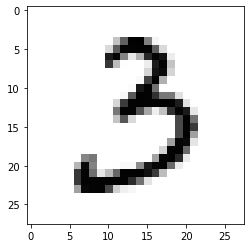

In [24]:
#select and show random value from test dataset
import random
random_int = random.randint(0,1000)
selected_input = test[random_int].split(',')
image_array = np.asfarray(selected_input[0:]).reshape((28,28))
plt.imshow(image_array, cmap = 'Greys', interpolation=None)
print("The target value is: " )

In [25]:
#predict the selected value
target_input=((np.asfarray(selected_input).reshape(784,1))/ 255.0 * 0.99) + 0.01 
A3,cache=forward_propagation(target_input,parameters)
label = np.argmax(A3)   
print("The predicted number is " + str(label))

The predicted number is 3
